<a href="https://colab.research.google.com/github/plenoi/CMU_DataScience/blob/master/InterpretableML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data from R to PyTHon

Load Test RData

In [16]:
!wget https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.RData
!wget https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/cervical.RData

--2019-11-10 07:19:39--  https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.RData
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15956 (16K) [application/octet-stream]
Saving to: ‘bike.RData.4’

bike.RData.4        100%[===================>]  15.58K  --.-KB/s    in 0.007s  

2019-11-10 07:19:39 (2.19 MB/s) - ‘bike.RData.4’ saved [15956/15956]

--2019-11-10 07:19:41--  https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/cervical.RData
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

Convert to Pandas Data Frame

In [17]:
#!pip install pyreadr
import pyreadr
result = pyreadr.read_r('bike.RData')
df = result["bike"]
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0.0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1.0
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2.0
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3.0
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4.0


In [18]:
import pyreadr
result = pyreadr.read_r('cervical.RData')
df = result["cervical"]
df.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
3,52,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Healthy


# Interpretible XGBoost

In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean = df_clean_column.dropna(axis = 0)
y = df_clean['pmmet']
X = df_clean.drop(['pmmet'],axis = 1)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [20]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=0, eta=0.01,objective= "binary:logistic", subsample=0.5)
model.fit(X_train_norm, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

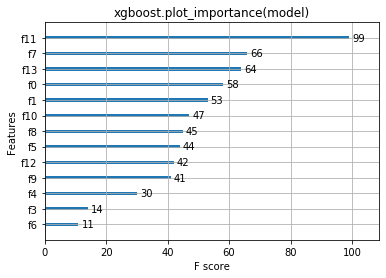

In [21]:
import matplotlib.pylab as pl
xgb.plot_importance(model, importance_type="weight")
pl.title("xgboost.plot_importance(model)")
pl.show()

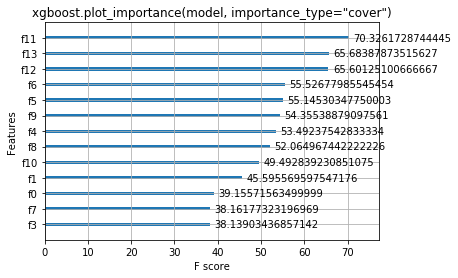

In [22]:
xgb.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

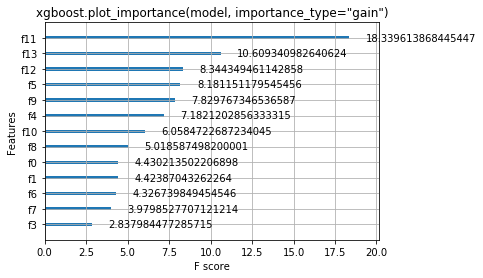

In [23]:
xgb.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

# Interpretable Random Forest

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 11 (0.302551)
2. feature 0 (0.109231)
3. feature 7 (0.090682)
4. feature 13 (0.078423)
5. feature 12 (0.067394)
6. feature 8 (0.053855)
7. feature 9 (0.053221)
8. feature 5 (0.053052)
9. feature 1 (0.052552)
10. feature 10 (0.048414)
11. feature 6 (0.039052)
12. feature 4 (0.029780)
13. feature 3 (0.020899)
14. feature 2 (0.000894)


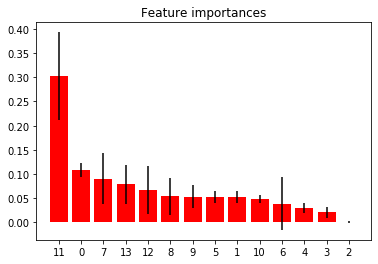

In [25]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
forest = RandomForestClassifier() 
forest.fit(X_train_norm, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Interpretable Support Vector Machine

Linear SVM

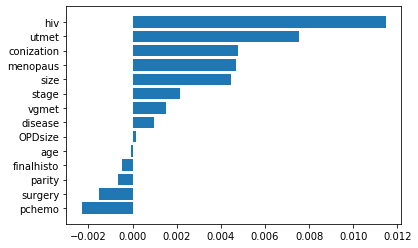

In [26]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
features_names = X.columns
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
f_importances(clf.coef_[0], features_names)

# LIME

In [0]:
!pip install lime

Create Classifier

In [27]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=0, eta=0.01,objective= "binary:logistic", subsample=0.5)
model.fit(X_train_norm, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

Create Explainer

In [0]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_norm,
feature_names=X.columns.values.tolist(),
class_names=['negative','positive'],
verbose=True, mode='classification')

Explain Instance

In [32]:
expXGB = explainer.explain_instance(X_test[5], model.predict_proba, num_features=len(X.columns))
expXGB.show_in_notebook(show_table=True)

Intercept 1.0945660531797679
Prediction_local [0.88396987]
Right: 0.28983074


#SHAP

In [0]:
#!pip install shap
import shap
explainerXGB = shap.TreeExplainer(model)
shap_values_XGB_train = explainerXGB.shap_values(X_train_norm)
shap_values_XGB_test = explainerXGB.shap_values(X_test_norm)

In [44]:
shap.initjs()
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[0], X_test[0], feature_names=X.columns)

Macro Level SHAP

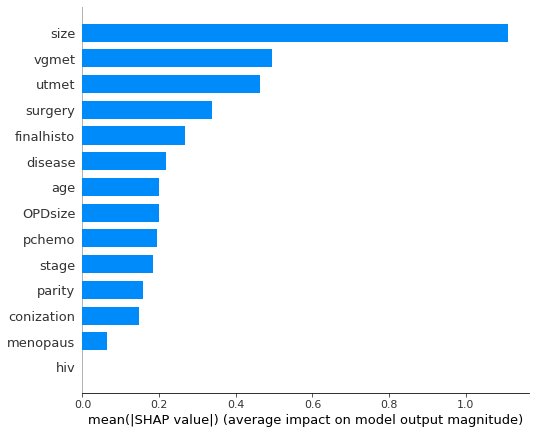

In [46]:
shap.summary_plot(shap_values_XGB_train, X_train, plot_type="bar", feature_names=X.columns)

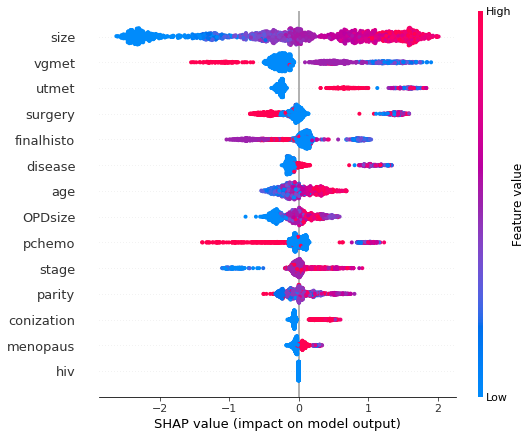

In [48]:
shap.summary_plot(shap_values_XGB_train, X_train, feature_names=X.columns)